In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

[]

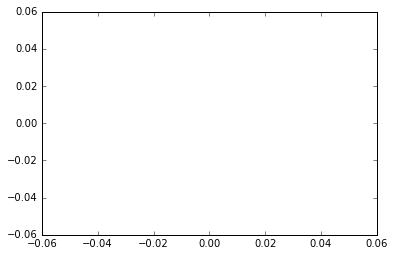

In [4]:
# make sure that graphs are embedded into our notebook output
%matplotlib inline

plt.plot() # create an empty graph

In [5]:
import urllib.request
poeUrl = "http://www.gutenberg.org/files/2147/2147-0.txt"
poeString = urllib.request.urlopen(poeUrl).read().decode().strip()

In [6]:
import os
# isolate The Gold Bug
start = poeString.find("THE GOLD-BUG")
end = poeString.find("FOUR BEASTS IN ONE")
goldBugString = poeString[start:end]
# save the file locally
directory = "data"
if not os.path.exists(directory):
    os.makedirs(directory)
with open("data/goldBug.txt", "w") as f:
    f.write(goldBugString)

In [7]:
import nltk

# read Gold Bug plain text into string
with open("data/goldBug.txt", "r") as f:
    goldBugString = f.read()

# simple lowercase tokenize
goldBugTokensLowercase = nltk.word_tokenize(goldBugString.lower())

# filter out tokens that aren't words
goldBugWordTokensLowercase = [word for word in goldBugTokensLowercase if any(c.isalpha() for c in word)]

# determine frequencies
goldBugWordTokensLowercaseFreqs = nltk.FreqDist(goldBugWordTokensLowercase)

# preview the top 20 frequencies
goldBugWordTokensLowercaseFreqs.tabulate(20)

 the   of  and    i   to    a   in   it  you  was that with  for   as  had   at   he this  but   we 
 877  465  359  336  329  327  238  213  162  137  130  114  113  113  110  108  103   99   99   98 


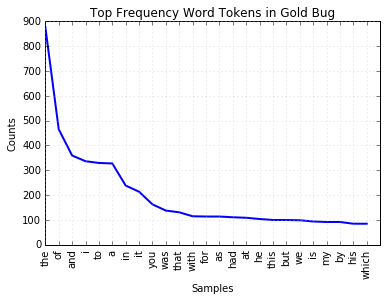

In [8]:

# make sure that graphs are embedded into our notebook output
%matplotlib inline

# plot the top frequency words in a graph
goldBugWordTokensLowercaseFreqs.plot(25, title="Top Frequency Word Tokens in Gold Bug")

In [9]:
goldBugLowerCaseWordTokenLengths = [len(w) for w in goldBugWordTokensLowercase]
print("first five words: ", goldBugWordTokensLowercase[:5])
print("first five word lengths: ", goldBugLowerCaseWordTokenLengths[:5])


first five words:  ['the', 'gold-bug', 'what', 'ho', 'what']
first five word lengths:  [3, 8, 4, 2, 4]


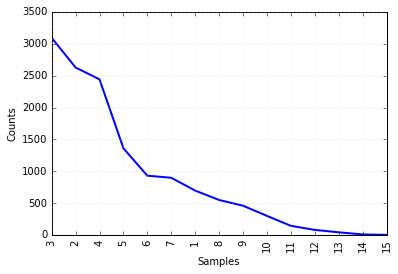

In [10]:
nltk.FreqDist(goldBugLowerCaseWordTokenLengths).plot()


In [11]:
goldBugLowerCaseWordTokenLengthFreqs = list(nltk.FreqDist(goldBugLowerCaseWordTokenLengths).items())
goldBugLowerCaseWordTokenLengthFreqs # sorted by word length (not frequency)

[(1, 697),
 (2, 2627),
 (3, 3092),
 (4, 2441),
 (5, 1360),
 (6, 931),
 (7, 898),
 (8, 550),
 (9, 460),
 (10, 301),
 (11, 145),
 (12, 81),
 (13, 43),
 (14, 10),
 (15, 3)]

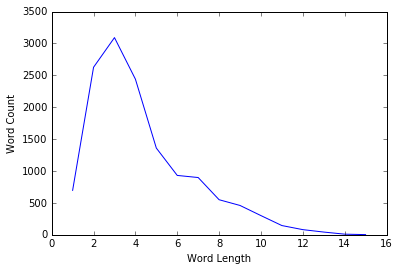

In [12]:
import matplotlib.pyplot as plt

goldBugLowerCaseWordTokenWordLengths = [f[0] for f in goldBugLowerCaseWordTokenLengthFreqs]
goldBugLowerCaseWordTokenWordLengthValues = [f[1] for f in goldBugLowerCaseWordTokenLengthFreqs]
plt.plot(goldBugLowerCaseWordTokenWordLengths, goldBugLowerCaseWordTokenWordLengthValues)
plt.xlabel('Word Length')
plt.ylabel('Word Count')

In [13]:
stopwords = nltk.corpus.stopwords.words("English")
goldBugContentWordTokensLowercase = [word for word in goldBugWordTokensLowercase if word not in stopwords]
goldBugContentWordTokensLowercaseFreqs = nltk.FreqDist(goldBugContentWordTokensLowercase)
goldBugContentWordTokensLowercaseFreqs.most_common(20)

[('upon', 81),
 ('de', 73),
 ("'s", 56),
 ('jupiter', 53),
 ('legrand', 47),
 ('one', 38),
 ('well', 35),
 ('said', 35),
 ('massa', 34),
 ('could', 33),
 ('bug', 32),
 ('skull', 29),
 ('parchment', 27),
 ('made', 25),
 ('tree', 25),
 ('time', 24),
 ('first', 24),
 ('much', 23),
 ('us', 23),
 ('two', 23)]

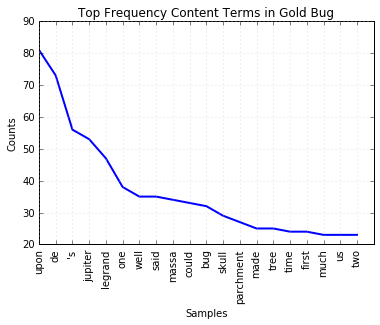

In [14]:
goldBugContentWordTokensLowercaseFreqs.plot(20, title="Top Frequency Content Terms in Gold Bug")

In [15]:
goldBugText = nltk.Text(nltk.word_tokenize(goldBugString))
goldBugText.concordance("jupiter", lines=5)
goldBugText.concordance("legrand", lines=5)

Displaying 5 of 53 matches:
ccompanied by an old negro , called Jupiter , who had been manumitted before th
rived to instil this obstinacy into Jupiter , with a view to the supervision an
nd gave me a most cordial welcome . Jupiter , grinning from ear to ear , bustle
 had hunted down and secured , with Jupiter 's assistance , a scarabæus which h
tellin on you , '' here interrupted Jupiter ; `` de bug is a goole bug , solid 
Displaying 5 of 47 matches:
cted an intimacy with a Mr. William Legrand . He was of an ancient Huguenot fam
 or more remote end of the island , Legrand had built himself a small hut , whi
ot improbable that the relatives of Legrand , conceiving him to be somewhat uns
repare some marsh-hens for supper . Legrand was in one of his fits -- how else 
 only known you were here ! '' said Legrand , `` but it 's so long since I saw 


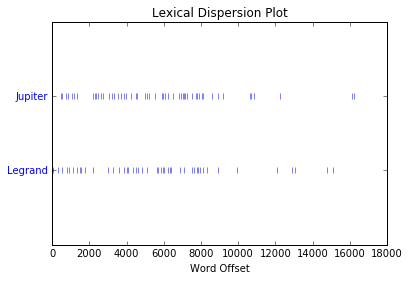

In [16]:
goldBugText.dispersion_plot(["Jupiter", "Legrand"])


# next steps

generate a simple list of the top 20 frequency lowercase content terms (without counts, just the terms)

In [17]:
# A combination of freqs and the list function learned in the last half?
goldBugTop = [word for word in goldBugWordTokensLowercase if word in goldBugContentWordTokensLowercaseFreqs.most_common(20)]

In [18]:
print(goldBugTop)

[]


In [19]:
# well, that didn't work. Can I set up something for the top twenty before doing the comparison thing?
goldBugTop2 = goldBugContentWordTokensLowercaseFreqs.most_common(20)

In [20]:
goldBugTop2

[('upon', 81),
 ('de', 73),
 ("'s", 56),
 ('jupiter', 53),
 ('legrand', 47),
 ('one', 38),
 ('well', 35),
 ('said', 35),
 ('massa', 34),
 ('could', 33),
 ('bug', 32),
 ('skull', 29),
 ('parchment', 27),
 ('made', 25),
 ('tree', 25),
 ('time', 24),
 ('first', 24),
 ('much', 23),
 ('us', 23),
 ('two', 23)]

In [21]:
goldBugFinal = [word[0] for word in goldBugTop2]

In [22]:
goldBugFinal

['upon',
 'de',
 "'s",
 'jupiter',
 'legrand',
 'one',
 'well',
 'said',
 'massa',
 'could',
 'bug',
 'skull',
 'parchment',
 'made',
 'tree',
 'time',
 'first',
 'much',
 'us',
 'two']

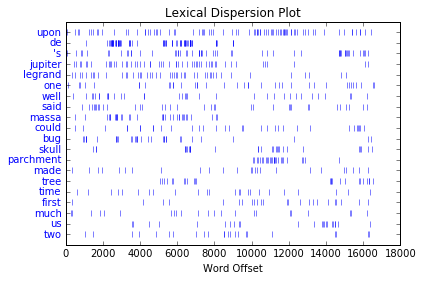

In [23]:
goldBugTextLower = nltk.Text(nltk.word_tokenize(goldBugString.lower()))
goldBugTextLower.dispersion_plot(goldBugFinal)

In [24]:
goldBugText.collocations()

left eye; fifty feet; main land; forty-one degrees; thirteen minutes;
fell upon; lef eye; seventh limb; black spots; intense excitement;
east side; Fort Moultrie; diagonally opposite; said Legrand; cried
Legrand; casual glance; tape measure; take hold; waistcoat pocket;
goole bug
